# Let's get started with coding

## Start with imports

In [1]:
import numpy as np
import random

## get library files

In [2]:
import ME461Group as DummyPlayer
from ME4612021Fproject import *
import tulumbaa as tulumba

In [3]:
# update tulumba library

8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--
	GROUP IDS and STARTING LOCATIONS 
8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--
     atlas ID = 6, starting from (575, 25)
backspacex ID = 5, starting from (375, 25)
    ducati ID = 4, starting from (175, 25)
    hepsi1 ID = 1, starting from (25, 175)
   mechrix ID = 8, starting from (375, 725)
  meturoam ID = 2, starting from (25, 375)
    nebula ID = 9, starting from (575, 725)
 ohmygroup ID = 7, starting from (175, 725)
   tulumba ID = 3, starting from (25, 575)

]4;0;#1b1e25\]4;1;#667475\]4;2;#947D74\]4;3;#74857A\]4;4;#617686\]4;5;#738B8B\]4;6;#7697A5\]4;7;#b1c8d7\]4;8;#7b8c96\]4;9;#667475\]4;10;#947D74\]4;11;#74857A\]4;12;#617686\]4;13;#738B8B\]4;14;#7697A5\]4;15;#b1c8d7\]10;#b1c8d7\]11;#1b1e25\]12;#b1c8d7\]13;#b1c8d7\]17;#b1c8d7\]19;#1b1e25\]4;232;#1b1e25\]4;256;#b1c8d7\]708;#1b1e25\

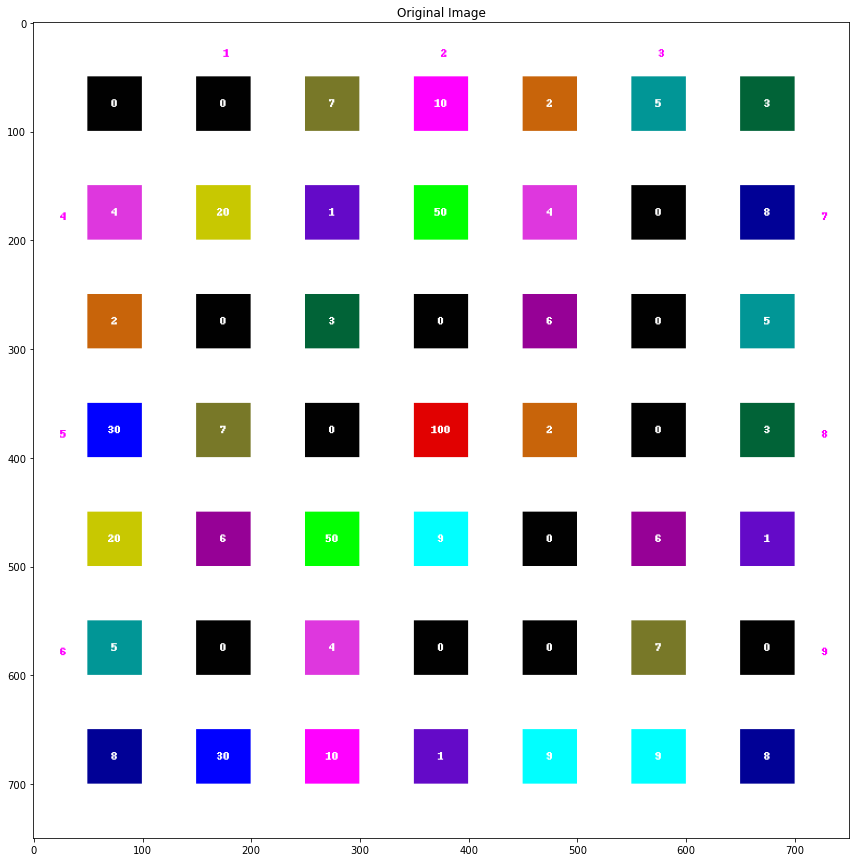

In [4]:
# initial points in the game for each player
Pinit = 301
# groups names
group_names = ['atlas', 'backspacex', 'ducati', 'hepsi1', 'mechrix', 'meturoam', 'nebula', 'ohmygroup', 'tulumba']
#group_names = ['altas', 'backspacex'] 
Players = {}
playerID = [x for x in range(len(group_names))] # generate player IDs
random.shuffle(playerID) # shuffle player order

# set default player locations, note that playerIDs are randomly ordered
initLocs = [(25, 175),(25, 375),(25, 575),(175, 25),(375, 25),(575, 25),(175, 725),(375, 725),(575, 725)]
# a summary of the players
legend = f'{12*"8<--"}\n\tGROUP IDS and STARTING LOCATIONS \n{12*"8<--"}\n'


# the game should be set up, let's plot an informative version of the game board
for gInd, gName in enumerate(group_names):
    if gName != 'tulumba':
        player = DummyPlayer.ME461Group(gName, colorz, maxStep, maxTime) # set the name, color and max step size for the current player
        # keep record of player object, player ID, a history list, their current location and current points
        Players[gName] = [player, playerID[gInd]+1, [], initLocs[playerID[gInd]], Pinit]
    else:
        player = tulumba.tulumba(gName, colorz, maxStep, maxTime) # set the name, color and max step size for the current player
        # keep record of player object, player ID, a history list, their current location and current points
        Players[gName] = [player, playerID[gInd]+1, [], initLocs[playerID[gInd]], Pinit]

# genereate a new game for these players
aGame = LetsPlayAGame(Players, initLocs, nCorr, colorz, imSize, digits, maxStep) 

for gInd, gName in enumerate(Players.keys()):
    aGame.aMaze.DrawPolyLine(aGame.pmaze, [initLocs[Players[gName][1]-1]], header = digits[Players[gName][1]] )
    legend +=f'{"{0: >10}".format(gName)} ID = {playerID[gInd]+1}, starting from {initLocs[playerID[gInd]]}\n'

# set figures to plot larger than default
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(aGame.pmaze)
plt.title('Original Image')
# finally print the legend
print(legend)
ormaze = aGame.pmaze.copy()
# in case you want a movie, clear frame images first
!rm frame*.png 2>>dumpy
# number of nowin sessions
numNoWin = 0

In [5]:
tulumba.tulumba('tulumba', colorz, maxStep, maxTime)

In [6]:
Players['tulumba'][0]

## Play a single game step


In [7]:
# debugger
tulumba.tulumba.run(Players['tulumba'][0],aGame.maze, aGame.GenerateInfo(Players))

[[425, 575], [425, 75]]

0.0031330900092143565:0.185189365001861


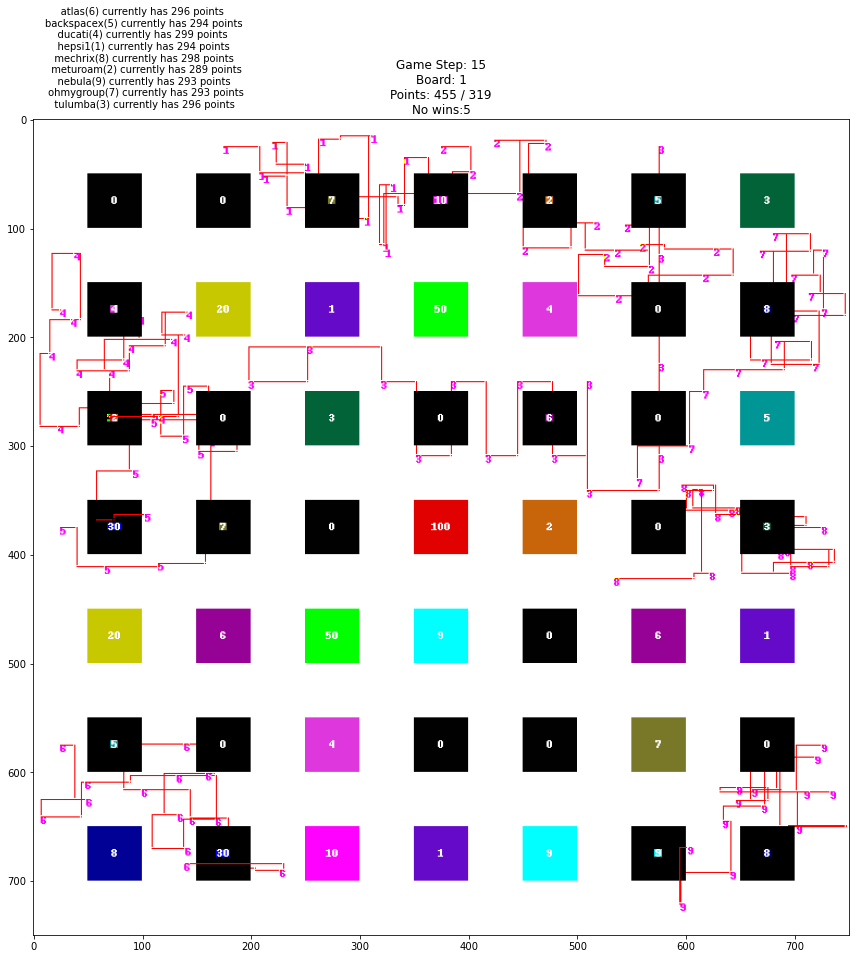

In [22]:
debugMode = False
numMaxNoPlay = 12
win, summary = aGame.PlayAStep(debugMode)
if win == []: # oops
    print(summary)
else:
    # perf contains time performance data
    if len(win.keys()) == 0:
        numNoWin += 1
    else: # reset no win counter
        numNoWin = 0
    # display results
    plt.rcParams["figure.figsize"] = (20,15)
    plt.imshow(aGame.pmaze)
    plt.text(10,10,summary+'\n')
    plt.title(f'Game Step: {aGame.numSteps}\nBoard: {aGame.numBoards}\nPoints: {TotalPoints()} / {aGame.aMaze.RemainingPoints()}\nNo wins:{numNoWin}')
    plt.savefig(f'frame{aGame.numSteps-1}.png')

    if numNoWin >= numMaxNoPlay or  aGame.aMaze.RemainingPoints() == 0: # then we need a new game
        if  aGame.aMaze.RemainingPoints() == 0:
            print('No bases left, board will be reset')
        else:
            print('Too many no win games, resetting board next time')
        aGame.ResetBoard()
        numNoWin = 0

